In [1]:
# Importing Libaries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# importing the data set
ld = pd.read_csv(r'C:\Users\HP\Downloads\Lendsqr Data Science Assessment Dataset v1.csv')
pd.set_option('display.max_columns', None)
ld.head()

,loan_id_,target,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,city,lga,requested_amount,purpose,loan_request_day,age,selfie_bvn_check,selfie_id_check,loans,emails,phone_numbers,logins,device_name,mobile_os,os_version,application_date
0,"137,379",Paid,F,Single,0,Own House,"BSc, HND and Other Equivalent",Self Employed,Others,"10,000",5/11/2021,Ikorodu,Ikorodu,"10,000",Medical,Monday,23,Successful,Successful,3,1,1,43,"iPhone8,2",ios,ios 15.0.1,5/1/2023
1,"197,764",Paid,M,Single,0,Own House,"BSc, HND and Other Equivalent",Employed,Others,"10,000",1/28/2024,Calabar,Calabar Municipal,"10,000",School Fees,Wednesday,32,Successful,Successful,3,1,1,54,INFINIX Infinix X669,android,android 31,3/27/2024
2,"153,589",Paid,M,Single,0,Rented Apartment,School Cert,Employed,Others,"10,000",7/4/2023,Lagos,Lagos,"20,000",Personal,Sunday,20,Successful,Successful,2,1,1,25,INFINIX Infinix X665C,android,android 31,7/16/2023
3,"198,748",Not Paid,M,Single,0,Rented Apartment,School Cert,Self Employed,Manufacturing and Construction,"10,000",4/1/2024,Osogbo,Egbedore,"10,000",Business,Monday,19,Successful,Successful,0,1,1,2,ITEL itel P662L,android,android 31,4/1/2024
4,"159,448",Paid,F,Married,0,Rented Apartment,"BSc, HND and Other Equivalent",Self Employed,Others,"10,000",2/22/2022,Lagos,Lagos,"8,000",Business,Thursday,28,Successful,Successful,0,1,1,1,Android Phone,Android,android 28,8/17/2023


In [3]:
ld = ld.drop('loan_id_', axis = 1)
ld.head()

,target,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,city,lga,requested_amount,purpose,loan_request_day,age,selfie_bvn_check,selfie_id_check,loans,emails,phone_numbers,logins,device_name,mobile_os,os_version,application_date
0,Paid,F,Single,0,Own House,"BSc, HND and Other Equivalent",Self Employed,Others,"10,000",5/11/2021,Ikorodu,Ikorodu,"10,000",Medical,Monday,23,Successful,Successful,3,1,1,43,"iPhone8,2",ios,ios 15.0.1,5/1/2023
1,Paid,M,Single,0,Own House,"BSc, HND and Other Equivalent",Employed,Others,"10,000",1/28/2024,Calabar,Calabar Municipal,"10,000",School Fees,Wednesday,32,Successful,Successful,3,1,1,54,INFINIX Infinix X669,android,android 31,3/27/2024
2,Paid,M,Single,0,Rented Apartment,School Cert,Employed,Others,"10,000",7/4/2023,Lagos,Lagos,"20,000",Personal,Sunday,20,Successful,Successful,2,1,1,25,INFINIX Infinix X665C,android,android 31,7/16/2023
3,Not Paid,M,Single,0,Rented Apartment,School Cert,Self Employed,Manufacturing and Construction,"10,000",4/1/2024,Osogbo,Egbedore,"10,000",Business,Monday,19,Successful,Successful,0,1,1,2,ITEL itel P662L,android,android 31,4/1/2024
4,Paid,F,Married,0,Rented Apartment,"BSc, HND and Other Equivalent",Self Employed,Others,"10,000",2/22/2022,Lagos,Lagos,"8,000",Business,Thursday,28,Successful,Successful,0,1,1,1,Android Phone,Android,android 28,8/17/2023


#### DATA CLEANING & FEATURE ENGINEERING

In [5]:
## Ensuring my column headers are properly written without spaces

In [6]:
ld.columns = ld.columns.str.strip()
ld.columns

Index(['target', 'gender', 'marital_status', 'no_of_dependent',
       'type_of_residence', 'educational_attainment', 'employment_status',
       'sector_of_employment', 'monthly_net_income', 'work_start_date', 'city',
       'lga', 'requested_amount', 'purpose', 'loan_request_day', 'age',
       'selfie_bvn_check', 'selfie_id_check', 'loans', 'emails',
       'phone_numbers', 'logins', 'device_name', 'mobile_os', 'os_version',
       'application_date'],
      dtype='object')

In [7]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   target                  4999 non-null   object
 1   gender                  4999 non-null   object
 2   marital_status          4999 non-null   object
 3   no_of_dependent         4999 non-null   object
 4   type_of_residence       4999 non-null   object
 5   educational_attainment  4998 non-null   object
 6   employment_status       4999 non-null   object
 7   sector_of_employment    4999 non-null   object
 8   monthly_net_income      4999 non-null   object
 9   work_start_date         4999 non-null   object
 10  city                    4999 non-null   object
 11  lga                     4854 non-null   object
 12  requested_amount        4999 non-null   object
 13  purpose                 4999 non-null   object
 14  loan_request_day        4999 non-null   object
 15  age 

In [8]:
# converting my work_start_date and application_date to a DATE function

In [9]:
ld['work_start_date'] = pd.to_datetime(ld['work_start_date'], errors='coerce')
ld['application_date'] = pd.to_datetime(ld['application_date'], errors='coerce')

In [10]:
# creating the months employed columns  from the  application date and work start date
ld['months_employed'] = ((ld['application_date'].dt.year - ld['work_start_date'].dt.year) * 12 + (ld['application_date'].dt.month - ld['work_start_date'].dt.month))

In [11]:
ld['months_employed'] = ld['months_employed'].fillna(0)

In [12]:
ld.head(3)

,target,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,city,lga,requested_amount,purpose,loan_request_day,age,selfie_bvn_check,selfie_id_check,loans,emails,phone_numbers,logins,device_name,mobile_os,os_version,application_date,months_employed
0,Paid,F,Single,0,Own House,"BSc, HND and Other Equivalent",Self Employed,Others,"10,000",2021-05-11,Ikorodu,Ikorodu,"10,000",Medical,Monday,23,Successful,Successful,3,1,1,43,"iPhone8,2",ios,ios 15.0.1,2023-05-01,24.0
1,Paid,M,Single,0,Own House,"BSc, HND and Other Equivalent",Employed,Others,"10,000",2024-01-28,Calabar,Calabar Municipal,"10,000",School Fees,Wednesday,32,Successful,Successful,3,1,1,54,INFINIX Infinix X669,android,android 31,2024-03-27,2.0
2,Paid,M,Single,0,Rented Apartment,School Cert,Employed,Others,"10,000",2023-07-04,Lagos,Lagos,"20,000",Personal,Sunday,20,Successful,Successful,2,1,1,25,INFINIX Infinix X665C,android,android 31,2023-07-16,0.0


In [13]:
### Critical observation on the features to look out for rare categories and applying domain knowledge 

In [14]:
ld['gender'].value_counts() 

gender
M    3842
F    1157
Name: count, dtype: int64

In [15]:
ld['purpose'].value_counts()

purpose
Personal          1634
Business          1592
Medical            778
Others             490
School Fees        195
Rent               176
Asset Purchase      68
Travel              37
Purpose             16
Holiday             13
Name: count, dtype: int64

In [16]:
# Combining 'School fees', 'Rent', 'Asset Purchase', 'Travel', 'Purpose', and 'Holiday'  into 'Other'
ld['purpose'] = ld['purpose'].replace(['School Fees', 'Rent', 'Asset Purchase', 'Travel', 'Purpose', 'Holiday'], 'Others')
ld['purpose'].value_counts()

purpose
Personal    1634
Business    1592
Others       995
Medical      778
Name: count, dtype: int64

In [17]:
ld['employment_status'].value_counts()

employment_status
Self Employed      2897
Employed           2082
Unemployed           17
Private Company       2
Retired               1
Name: count, dtype: int64

In [18]:
# Combining  'Private Company', 'Unemployed', 'Retired'  into 'Other'
ld['employment_status'] = ld['employment_status'].replace(['Private Company', 'Unemployed', 'Retired'], 'Others')
ld['employment_status'].value_counts()

employment_status
Self Employed    2897
Employed         2082
Others             20
Name: count, dtype: int64

In [19]:
ld['marital_status'].value_counts()

marital_status
Single       3208
Married      1745
Separated      26
Divorced       12
Widowed         8
Name: count, dtype: int64

In [20]:
# Combine 'divorced', 'widowed', and 'separated' into 'Other'
ld['marital_status'] = ld['marital_status'].replace(['Divorced', 'Widowed', 'Separated'], 'Others')
ld['marital_status'].value_counts()

marital_status
Single     3208
Married    1745
Others       46
Name: count, dtype: int64

In [21]:
ld['sector_of_employment'].value_counts()

sector_of_employment
Others                                1016
Wholesale and Retail Trade             878
Manufacturing and Construction         550
Agriculture                            305
Education                              302
Information Technology                 291
Transportation & Logistics             249
Other Financial                        228
Media & Entertainment                  215
Public services and administration     194
Healthcare                             182
Oil and Gas                            162
Hospitality and Events                 142
Banking                                114
Telecoms                                94
NGO                                     31
Tourism & Hospitality                   26
Law                                     20
Name: count, dtype: int64

In [22]:
sectors_to_group = [
    'Other Financial', 'Media & Entertainment', 'Public services and administration', 
    'Healthcare', 'Oil and Gas', 'Hospitality and Events', 'Banking', 
    'Telecoms', 'NGO', 'Tourism & Hospitality', 'Law']

# Replace the specified sectors with "Others"
ld['sector_of_employment'] = ld['sector_of_employment'].replace(sectors_to_group, 'Others')

In [23]:
ld['sector_of_employment'].value_counts()

sector_of_employment
Others                            2424
Wholesale and Retail Trade         878
Manufacturing and Construction     550
Agriculture                        305
Education                          302
Information Technology             291
Transportation & Logistics         249
Name: count, dtype: int64

In [24]:
ld['type_of_residence'].value_counts() ## no rare categories

type_of_residence
Rented Apartment     2999
Own House            1316
Parents Apartment     684
Name: count, dtype: int64

In [25]:
ld['educational_attainment'].value_counts()

educational_attainment
BSc, HND and Other Equivalent    3199
School Cert                       539
MSc and Above                     434
Diploma                           353
Diploma/School Cert               197
Others                            162
Vocation/Technical                 62
Apprenticeship and Crafts          52
Name: count, dtype: int64

In [26]:
# Combine 'Vocation/Technical', 'Apprenticeship and Crafts' into 'Other'
education_to_group = ['Vocation/Technical', 'Apprenticeship and Crafts']
ld['educational_attainment'] = ld['educational_attainment'].replace(education_to_group, 'Others')
ld['educational_attainment'].value_counts()

educational_attainment
BSc, HND and Other Equivalent    3199
School Cert                       539
MSc and Above                     434
Diploma                           353
Others                            276
Diploma/School Cert               197
Name: count, dtype: int64

In [27]:
ld['mobile_os'].value_counts()

mobile_os
android        2711
ios            2093
Android         152
windows          30
linux             4
mac os            3
mobile            3
chromium os       2
web               1
Name: count, dtype: int64

In [28]:
# Combine 'Android', 'windows', 'linux', 'mac os', 'mobile', 'chromium os', 'web' into 'Other'
os_to_group = ['Android', 'windows', 'linux', 'mac os', 'mobile', 'chromium os', 'web']

ld['mobile_os'] = ld['mobile_os'].replace(os_to_group, 'Others')

In [29]:
ld['mobile_os'].value_counts()

mobile_os
android    2711
ios        2093
Others      195
Name: count, dtype: int64

In [30]:
ld['selfie_bvn_check'].value_counts()

selfie_bvn_check
Successful    4978
Failed          20
Pending          1
Name: count, dtype: int64

In [31]:
## Combine 'Pending','Failed' into 'Other'
ld['selfie_bvn_check'] = ld['selfie_bvn_check'].replace(['Pending','Failed'], 'Others')

In [32]:
ld['selfie_bvn_check'].value_counts()

selfie_bvn_check
Successful    4978
Others          21
Name: count, dtype: int64

In [33]:
ld['selfie_id_check'].value_counts()

selfie_id_check
Successful    4679
Pending        192
Failed         128
Name: count, dtype: int64

In [34]:
# Combine 'Pending','Failed' into 'Other'
ld['selfie_id_check'] = ld['selfie_id_check'].replace(['Pending','Failed'], 'Others')

In [35]:
ld['selfie_id_check'].value_counts()

selfie_id_check
Successful    4679
Others         320
Name: count, dtype: int64

In [36]:
ld['no_of_dependent'].value_counts()

no_of_dependent
0            3106
1             815
2             660
3 or more     418
Name: count, dtype: int64

In [37]:
ld['no_of_dependent'] = ld['no_of_dependent'].str.replace('3 or more', '3')
ld['no_of_dependent'] = ld['no_of_dependent'].astype(int)
ld['no_of_dependent'].value_counts()

no_of_dependent
0    3106
1     815
2     660
3     418
Name: count, dtype: int64

In [38]:
# Removing the ',' in the monthly_net_come
ld['monthly_net_income'] = ld['monthly_net_income'].str.replace(',', '')
ld['monthly_net_income'] = ld['monthly_net_income'].astype(int)

In [39]:
ld['monthly_net_income'].value_counts()

monthly_net_income
55000      1461
100000     1382
10000      1093
200000      884
400000       69
1000000      51
700000       50
50000         2
95000         2
85000         2
30000         1
460990        1
60000         1
Name: count, dtype: int64

In [40]:
# reducing skewness and converting the income column to bins

In [41]:
bins = [0, 50000, 100000, 200000, 400000, float('inf')]
labels = ['Low(0-49999)', 'Medium-Low(50000-99999)', 'Medium(100000-199999)', 'High(200000-399999)', 'Very High(400000+)']

ld['income_range'] = pd.cut(ld['monthly_net_income'], bins=bins, labels=labels)

In [42]:
ld['income_range'].value_counts()

income_range
Medium-Low(50000-99999)    2848
Low(0-49999)               1096
Medium(10000-199999)        884
Very High(400000+)          102
High(200000-399999)          69
Name: count, dtype: int64

In [43]:
ld['logins'].value_counts()
pd.set_option('display.max_rows', None)

In [44]:
# Removing ',' in the logins 
ld['logins'] = ld['logins'].str.replace(',', '')
ld['logins'] = ld['logins'].astype(int)


In [45]:
# Removing ',' in the requested_amount 
ld['requested_amount'] = ld['requested_amount'].str.replace(',', '')
ld['requested_amount'] = ld['requested_amount'].astype(int)
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   target                  4999 non-null   object        
 1   gender                  4999 non-null   object        
 2   marital_status          4999 non-null   object        
 3   no_of_dependent         4999 non-null   int32         
 4   type_of_residence       4999 non-null   object        
 5   educational_attainment  4998 non-null   object        
 6   employment_status       4999 non-null   object        
 7   sector_of_employment    4999 non-null   object        
 8   monthly_net_income      4999 non-null   int32         
 9   work_start_date         4997 non-null   datetime64[ns]
 10  city                    4999 non-null   object        
 11  lga                     4854 non-null   object        
 12  requested_amount        4999 non-null   int32   

In [46]:
ld['target'].value_counts()

target
Paid        4141
Not Paid     858
Name: count, dtype: int64

In [47]:
# Encoding the output to 1's and 0's
ld['target'] = ld['target'].str.replace('Not Paid', '0').replace('Paid', '1')
ld['target'] = ld['target'].astype(int)
ld['target'].value_counts()

target
1    4141
0     858
Name: count, dtype: int64

In [48]:
ld['device_name'].unique() ## This column would be dropped.

array(['iPhone8,2', 'INFINIX Infinix X669', 'INFINIX Infinix X665C',
       'ITEL itel P662L', 'Android Phone',
       'INFINIX MOBILITY LIMITED Infinix X690B', 'iPhone11,8',
       'iPhone11,6', 'samsung SM-G973F', 'iPhone12,5',
       'samsung SM-G960U1', 'GIONEE GIONEE S10', 'K', 'iPhone13,4',
       'iPhone14,5', 'iPhone12,1', 'TECNO MOBILE LIMITED TECNO KF7j',
       'TECNO MOBILE LIMITED TECNO KC8', 'iPhone12,3', 'samsung SM-A022F',
       'samsung SM-G965U', 'TECNO TECNO KI5k', 'TECNO TECNO BF7',
       'iPhone9,4', 'iPhone10,6', 'iPhone13,3', 'TECNO TECNO CI6',
       'iPhone10,3', 'TECNO MOBILE LIMITED TECNO KG5k', 'Apple iPhone',
       'iPhone9,1', 'INFINIX MOBILITY LIMITED Infinix X652',
       'TECNO MOBILE LIMITED TECNO KE5', 'iPhone10,5',
       'HMD Global Nokia C30', 'TECNO MOBILE LIMITED TECNO KF6i',
       'TECNO MOBILE LIMITED TECNO LE6',
       'INFINIX MOBILITY LIMITED Infinix X650B', 'iPhone15,2',
       'INFINIX Infinix X678B', 'iPhone9,3', 'Xiaomi 23106RN0DA',


In [49]:
ld['lga'].unique() ## This column would be dropped.

array(['Ikorodu', 'Calabar Municipal', 'Lagos', 'Egbedore', 'Obio/Akpor',
       'Akoko South-East', 'Ado Ekiti', 'Ifo', 'Ibadan North',
       'Ife Central', 'Shagamu', 'Abeokuta North', 'Maiduguri',
       'Enugu South', 'Alimosho', 'Akure South', 'Idanre',
       'Port Harcourt', 'Agege', 'Mbaitoli', 'Lagos Mainland',
       'Municipal Area Council', nan, 'Oshodi-Isolo', 'Bwari',
       'Ado-Odo/Ota', 'Eti Osa', 'Esan West', 'Ibadan North-West',
       'Ibadan South-West', 'Ikeja', 'Akoko North-West', 'Ikpoba Okha',
       'Uvwie', 'Nasarawa', 'Abakaliki', 'Ede South', 'Kosofe',
       'Lagos Island', 'Ilorin East', 'Irepodun/Ifelodun', 'Surulere',
       'Osogbo', 'Sokoto South', 'Ido', 'Ibeju-Lekki', 'Mangu', 'Afijio',
       'Apapa', 'Igabi', 'Ethiope East', 'Ojo', 'Gwale', 'Epe',
       'Oshimili South', 'Owerri North', 'Amuwo-Odofin',
       'Ovia North-East', 'Mushin', 'Ifelodun', 'Ilorin South',
       'Aba North', 'Oyun', 'Oredo', 'Etsako West', 'Lokoja', 'Chanchaga',
      

In [50]:
ld['city'].unique() ## This column would be dropped.

array(['Ikorodu', 'Calabar ', 'Lagos', 'Osogbo ', 'Port Harcourt ',
       'Epinmi Akoko', 'Fedral poly', 'Agbado', 'Ibadan', 'Ile ife',
       'Ogijo', 'Abeokuta', 'Maiduguri', 'Enugu', 'Ayobo', 'Akure',
       'Akure ', 'Shasha', 'Lagos ', 'Ogbaku Onitsha road Owerri ',
       'LAGOS ', 'Abuja', 'Obafemi-Owode', 'Kubwa ', 'Calabar', 'Egbeda ',
       'Otta', 'Ekpoma', 'Ibadan ', 'Ikeja', 'Ondo', 'Benin city',
       'Effurun ', 'Egbeda', 'Ikotun', 'Ikotun ', 'Kano', 'Roku',
       'Benin city ', 'Ede', 'Ikosi ketu ', 'Lekki', 'Ikota', 'Ikoyi',
       'Ilorin ', 'ikom', 'Baruwa bus stop ', 'Are ', 'Surulere',
       'Oshogbo', 'Sokoto', 'Victory island', 'Igbesa', 'Jos', 'Ado',
       'Ilora', 'Benin City', 'Apapa', 'Kaduna', 'Warri ', 'Ajangbadi',
       'Likosi', 'Abuja ', 'Asaba ', 'Owerri ', 'Lafos', 'Davol',
       'Portharcourt ', 'Osogbo', 'Ikirun', 'Ilorin', 'llorin', 'Aba',
       'Ogun', 'Alimosho Igando', 'Epe', 'Sango ota', 'Offa', 'Benin',
       'FCT', 'Auchi', 'Lokoja',

In [51]:
ld['os_version'].unique() ## This column would be dropped.

array(['ios 15.0.1', 'android 31', 'android 28', 'android 29', 'ios 15.4',
       'ios 15.3.1', 'ios 15.5', 'android 24', '10', 'ios 17.2.1',
       'ios 16.2', 'ios 16.0.2', 'android 30', 'ios 16.5', 'ios 15.7.3',
       'ios 16.6', 'ios 16.4.1', 'ios 16.7', 'ios 17.4.1', 'ios 16.7.5',
       'ios 16.6.1', '17.1.1', 'ios 15.7.6', 'ios 16.3.1', 'ios 16.5.1',
       'ios 15.6.1', 'ios 17.0', 'android 33', 'ios 15.8.1', 'ios 14.0',
       '16.6', 'ios 15.6', 'ios 12.5.7', 'ios 15.7.9', 'ios 17.0.2',
       'ios 17.0.3', 'android 34', 'ios 13.6', 'ios 14.4.2', 'android 23',
       'android 26', 'android 27', '13', '16.7', 'ios 15.1', 'ios 14.6',
       'ios 17.0.1', 'ios 17.1.2', 'ios 16.4', 'ios 16.1.2', 'ios 15.4.1',
       'ios 17.1.1', 'ios 14.3', 'ios 15.7.5', 'ios 14.4', 'ios 12.5.6',
       'ios 14.7.1', 'ios 14.2', 'ios 16.3', 'ios 16.1.1', 'ios 15.8',
       'ios 15.2', 'ios 13.1', '15.4.1', 'ios 16.0', 'ios 15.7.1',
       'ios 12.5.5', 'ios 16.0.3', 'ios 15.7.2', 'ios 15.0.2',


####### DROPPING COLUMNS BASED ON DOMAIN KNOWLEDGE


In [53]:
## SINCE MONTHS_EMPLOYED HAS BEEN DERIVED FROM WORK_START_DAY AND APPLICATION_DATE. MAKES SENSE TO DROP THEM NOW

###### Similarly, we have to drop the monthly_net_income since the income_range was derived from it in order to reduce skewness in the dataset

In [55]:
ld = ld.drop(['work_start_date','city','lga','os_version','logins','application_date','device_name','monthly_net_income'], axis = 1)


In [56]:
ld.isna().sum()

target                    0
gender                    0
marital_status            0
no_of_dependent           0
type_of_residence         0
educational_attainment    1
employment_status         0
sector_of_employment      0
requested_amount          0
purpose                   0
loan_request_day          0
age                       0
selfie_bvn_check          0
selfie_id_check           0
loans                     0
emails                    0
phone_numbers             0
mobile_os                 0
months_employed           0
income_range              0
dtype: int64

In [57]:
ld = ld.dropna(subset=[ 'educational_attainment'])
ld.isnull().sum()

target                    0
gender                    0
marital_status            0
no_of_dependent           0
type_of_residence         0
educational_attainment    0
employment_status         0
sector_of_employment      0
requested_amount          0
purpose                   0
loan_request_day          0
age                       0
selfie_bvn_check          0
selfie_id_check           0
loans                     0
emails                    0
phone_numbers             0
mobile_os                 0
months_employed           0
income_range              0
dtype: int64

In [58]:
# Checking for Duplicated data
ld.duplicated().sum()

1

In [59]:
# Drop duplicate rows
ld = ld.drop_duplicates()
ld = ld.reset_index(drop=True)
ld.duplicated().sum()

0

In [60]:
## USING CHI-SQAURE AND CRAMERS TO CHECK FOR CATETGORICAL FEATURES RELEVANCE TO OUR TARGET

import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = sum(confusion_matrix.sum())
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


categorical_columns = ['gender','employment_status','sector_of_employment','loan_request_day','selfie_bvn_check','selfie_id_check','type_of_residence','marital_status', 'educational_attainment', 'purpose','mobile_os','income_range']

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=['target'])


for col in categorical_columns:
    cramers_v_matrix.loc[col, 'target'] = cramers_v(ld[col], ld['target'])


print(cramers_v_matrix)

                          target
gender                  0.022846
employment_status        0.01088
sector_of_employment     0.04962
loan_request_day        0.047757
selfie_bvn_check             0.0
selfie_id_check         0.016137
type_of_residence       0.061284
marital_status          0.006127
educational_attainment  0.051183
purpose                 0.087931
mobile_os               0.073171
income_range            0.047226


####  The categorical columns are not correlated to our dependent variable and would have a very weak explanatory power to our model.  However, the SL will be set to  1%(0.01)   and select  the features that will be used to train my model. The marital_status and selfie_bvn_check inputs  have  little to no significance level, definitely have zero explanatory power.  

# Exploratory Data Analysis ON NUMERICAL FEATURES

In [63]:
num_feat = ['target', 'age','no_of_dependent',
            'requested_amount','loans','emails','phone_numbers','months_employed']

In [64]:
corr = ld[num_feat].corr()
corr

,target,age,no_of_dependent,requested_amount,loans,emails,phone_numbers,months_employed
target,1.000000,0.059643,0.007435,0.022205,0.049104,0.006863,-0.023247,0.003843
age,0.059643,1.000000,0.659606,0.103140,0.102290,0.051289,0.041240,0.383668
no_of_dependent,0.007435,0.659606,1.000000,0.072087,0.030495,0.042187,0.036515,0.311309
requested_amount,0.022205,0.103140,0.072087,1.000000,0.429283,0.085929,-0.004893,0.019639
loans,0.049104,0.102290,0.030495,0.429283,1.000000,0.115624,-0.011025,0.024958
emails,0.006863,0.051289,0.042187,0.085929,0.115624,1.000000,0.286869,-0.004089
phone_numbers,-0.023247,0.041240,0.036515,-0.004893,-0.011025,0.286869,1.000000,0.034506
months_employed,0.003843,0.383668,0.311309,0.019639,0.024958,-0.004089,0.034506,1.000000


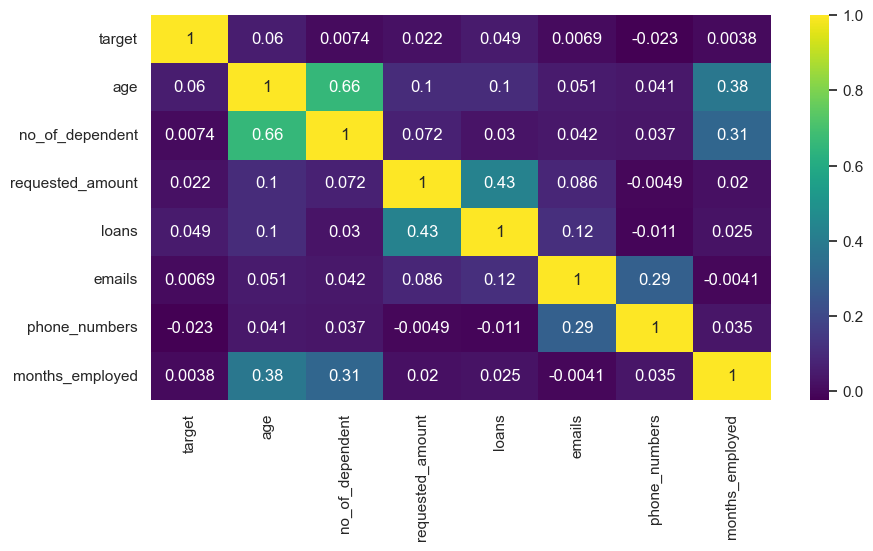

In [65]:
# visualizing the correlation using a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot = True,cmap= 'viridis')
plt.show()

#### Simiarly, using the SL of 1% (0.01), it's evident that month_employed, emails, no_of dependent would  have weak expanatory  power to our dependent variable( output/target). Moreover, it is evident that both age and no_of_dependent are correlated which would result to noise when training the model.  Dropping all numerical and categorical features with less than SL of 0.01 

In [67]:
ld = ld.drop(['selfie_bvn_check','emails','months_employed','no_of_dependent','marital_status'], axis = 1)
ld.head()

,target,gender,type_of_residence,educational_attainment,employment_status,sector_of_employment,requested_amount,purpose,loan_request_day,age,selfie_id_check,loans,phone_numbers,mobile_os,income_range
0,1,F,Own House,"BSc, HND and Other Equivalent",Self Employed,Others,10000,Medical,Monday,23,Successful,3,1,ios,Low(0-49999)
1,1,M,Own House,"BSc, HND and Other Equivalent",Employed,Others,10000,Others,Wednesday,32,Successful,3,1,android,Low(0-49999)
2,1,M,Rented Apartment,School Cert,Employed,Others,20000,Personal,Sunday,20,Successful,2,1,android,Low(0-49999)
3,0,M,Rented Apartment,School Cert,Self Employed,Manufacturing and Construction,10000,Business,Monday,19,Successful,0,1,android,Low(0-49999)
4,1,F,Rented Apartment,"BSc, HND and Other Equivalent",Self Employed,Others,8000,Business,Thursday,28,Successful,0,1,Others,Low(0-49999)


<Axes: xlabel='target', ylabel='age'>

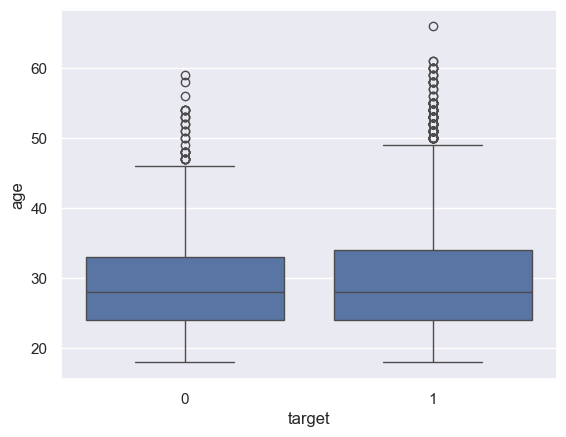

In [68]:
# Checking the relationship between TARGET AND AGE.
#plt.figure(figsize=(7,7))
sns.boxplot(data = ld ,x='target',y='age')

#### observation: the visualization shows the likelihood of  older applicants able to pay back loans

<Axes: xlabel='target', ylabel='loans'>

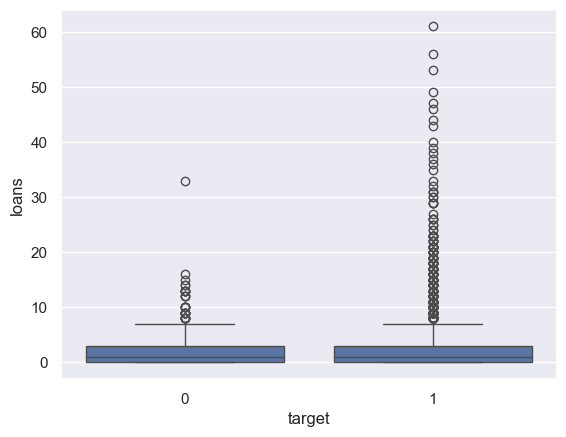

In [70]:
# Checking the relationship between TARGET AND LOANS.
#plt.figure(figsize=(7,5))
sns.boxplot(data = ld ,x='target',y='loans')

# EXPLORATORY DATA ANALYSIS ON CATEGORICAL FEATURES

### GENDER

<Axes: xlabel='gender', ylabel='count'>

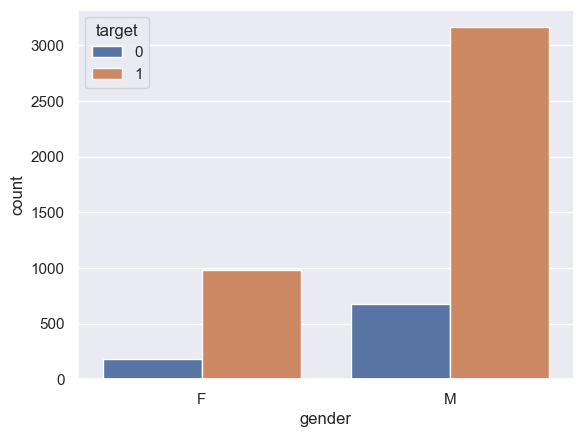

In [73]:
sns.countplot(data = ld,x = 'gender', hue = 'target', order = sorted(ld['gender'].unique()))

<Axes: xlabel='gender'>

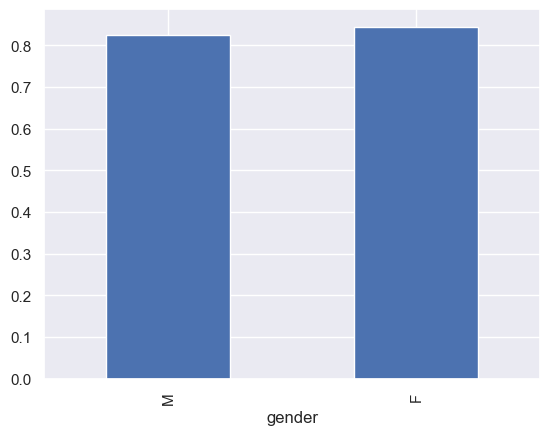

In [74]:
# percentage ratio for gender category, by target
gender_paid = ld[ld['target']==1].groupby('gender').count()['target']
gender_not_paid = ld[ld['target']==0].groupby('gender').count()['target']
percentage_gender_target = gender_paid/ (gender_paid + gender_not_paid)

percentage_gender_target.sort_values().plot(kind = 'bar')

#### INCOME RANGE

<Axes: xlabel='income_range', ylabel='count'>

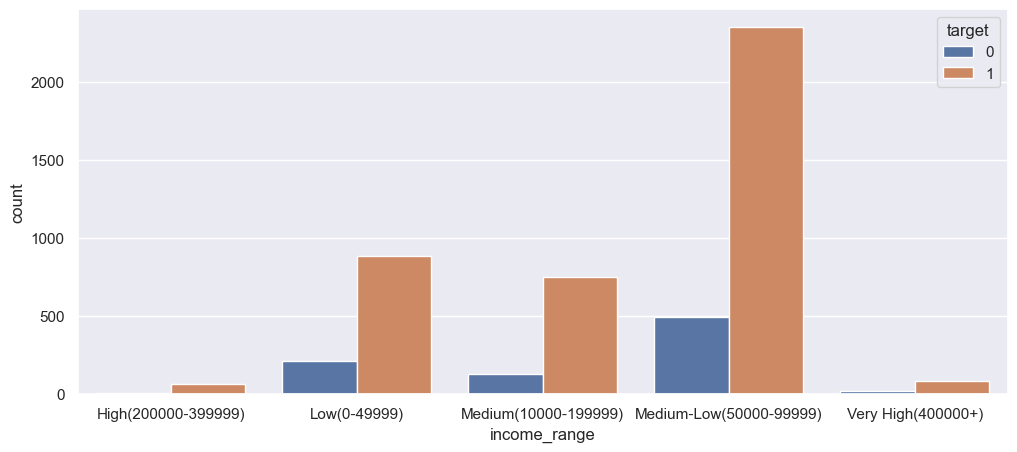

In [76]:
plt.figure(figsize = (12, 5))
sns.countplot(data = ld,x = 'income_range', hue = 'target', order = sorted(ld['income_range'].unique()))

<Axes: xlabel='income_range'>

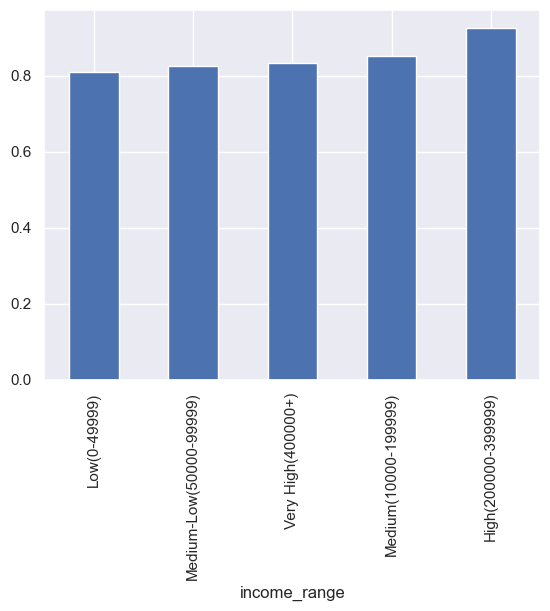

In [77]:
# Income Range
income_paid = ld[ld['target'] == 1].groupby('income_range').count()['target']
income_not_paid = ld[ld['target'] == 0].groupby('income_range').count()['target']
percentage_income_target = income_paid / (income_paid + income_not_paid)
percentage_income_target.sort_values().plot(kind='bar')

# TYPE OF RESIDENCE

<Axes: xlabel='type_of_residence', ylabel='count'>

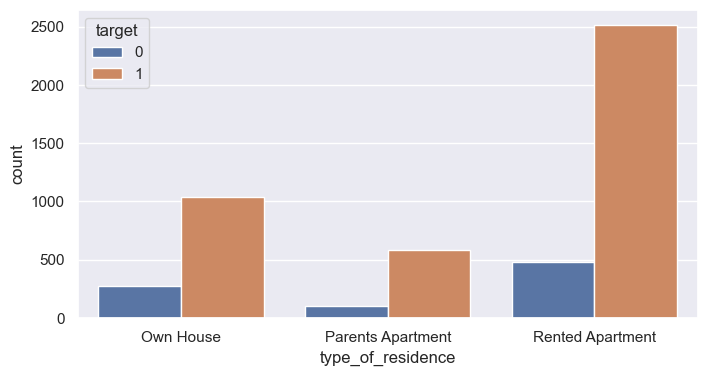

In [79]:
plt.figure(figsize=(8,4))
sns.countplot(data = ld,x = 'type_of_residence', hue = 'target', order = sorted(ld['type_of_residence'].unique()))

<Axes: xlabel='type_of_residence'>

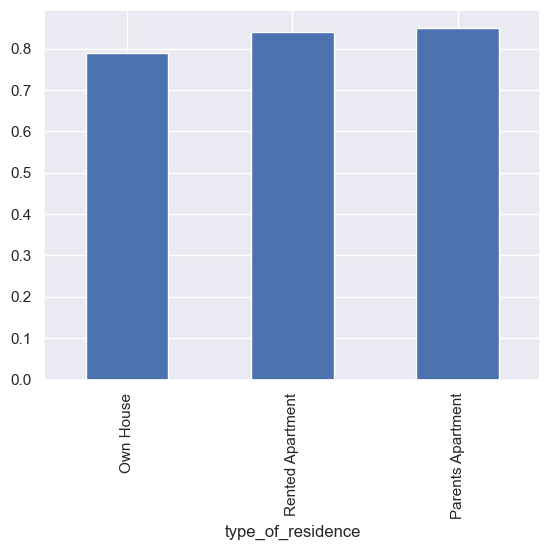

In [80]:
# Type of Residence
residence_paid = ld[ld['target'] == 1].groupby('type_of_residence').count()['target']
residence_not_paid = ld[ld['target'] == 0].groupby('type_of_residence').count()['target']
percentage_residence_target = residence_paid / (residence_paid + residence_not_paid)

percentage_residence_target.sort_values().plot(kind = 'bar')

### EDUCATIONAL ATTAINMENT

<Axes: xlabel='educational_attainment', ylabel='count'>

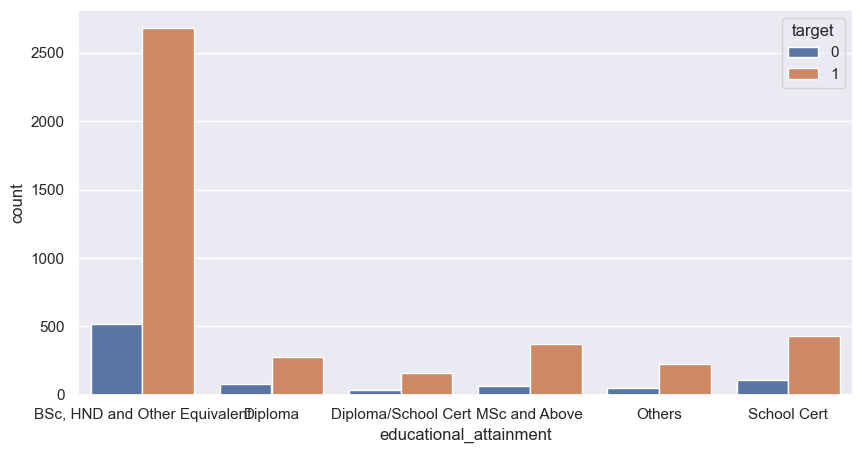

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(data = ld,x = 'educational_attainment', hue = 'target', order = sorted(ld['educational_attainment'].unique()))

<Axes: xlabel='educational_attainment'>

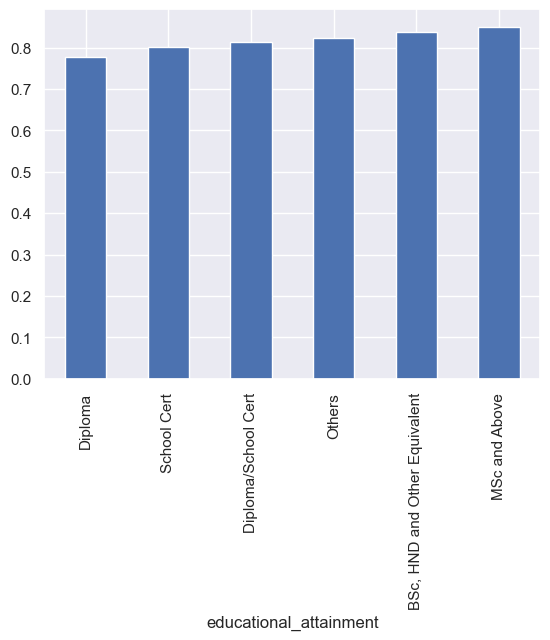

In [83]:
# Educational Attainment
education_paid = ld[ld['target'] == 1].groupby('educational_attainment').count()['target']
education_not_paid = ld[ld['target'] == 0].groupby('educational_attainment').count()['target']
percentage_education_target = education_paid / (education_paid + education_not_paid)
percentage_education_target.sort_values().plot(kind = 'bar')

### EMPLOYMENT STATUS

<Axes: xlabel='employment_status', ylabel='count'>

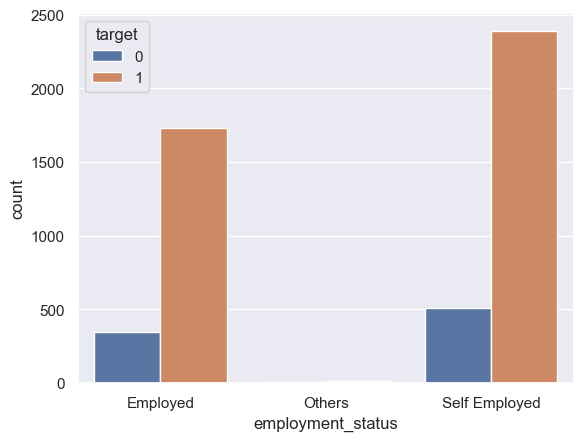

In [85]:
#plt.figure(figsize=(7,5))
sns.countplot(data = ld,x = 'employment_status', hue = 'target', order = sorted(ld['employment_status'].unique()))

<Axes: xlabel='employment_status'>

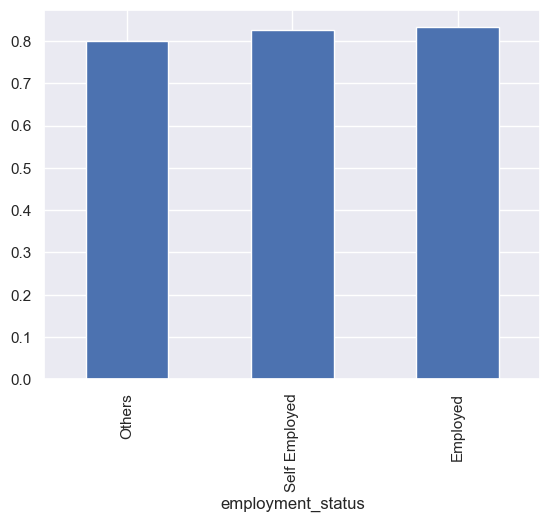

In [86]:
# Employment Status
employment_paid = ld[ld['target'] == 1].groupby('employment_status').count()['target']
employment_not_paid = ld[ld['target'] == 0].groupby('employment_status').count()['target']
percentage_employment_target = employment_paid / (employment_paid + employment_not_paid)
percentage_employment_target.sort_values().plot(kind = 'bar')

### PURPOSE

<Axes: xlabel='purpose', ylabel='count'>

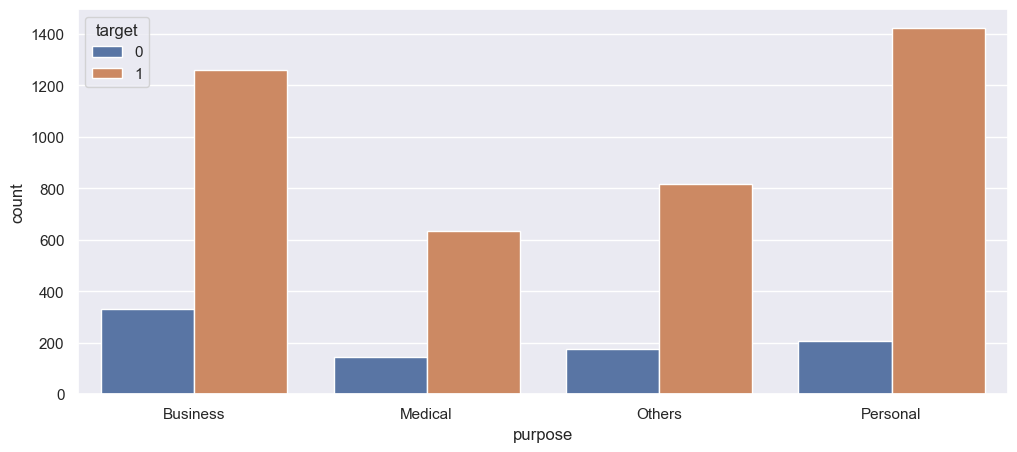

In [88]:
plt.figure(figsize=(12,5))
sns.countplot(data = ld,x = 'purpose', hue = 'target', order = sorted(ld['purpose'].unique()))

<Axes: xlabel='purpose'>

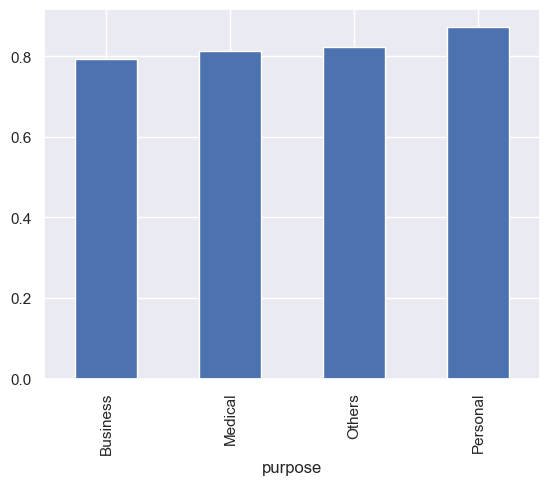

In [89]:
# Purpose
purpose_paid = ld[ld['target'] == 1].groupby('purpose').count()['target']
purpose_not_paid = ld[ld['target'] == 0].groupby('purpose').count()['target']
percentage_purpose_target = purpose_paid / (purpose_paid + purpose_not_paid)
percentage_purpose_target.sort_values().plot(kind = 'bar')

### SELFIE ID CHECK

<Axes: xlabel='selfie_id_check', ylabel='count'>

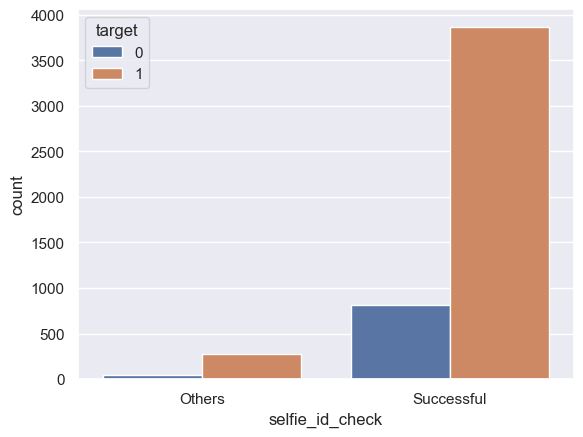

In [91]:
#plt.figure(figsize=(8,5))
sns.countplot(data = ld,x = 'selfie_id_check', hue = 'target',  order = sorted(ld['selfie_id_check'].unique()))

<Axes: xlabel='selfie_id_check'>

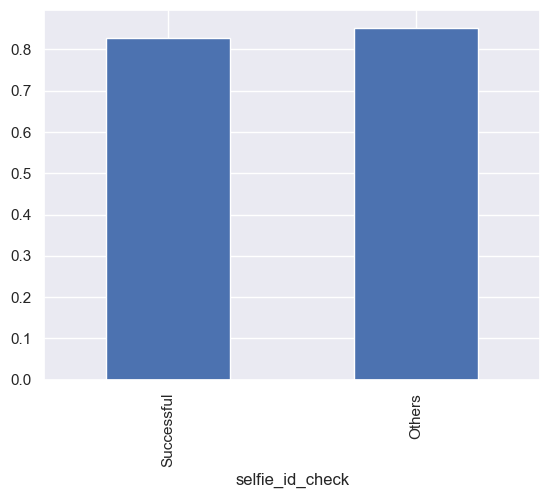

In [92]:
# Selfie ID Check
id_paid = ld[ld['target'] == 1].groupby('selfie_id_check').count()['target']
id_not_paid = ld[ld['target'] == 0].groupby('selfie_id_check').count()['target']
percentage_id_target = id_paid / (id_paid + id_not_paid)
percentage_id_target.sort_values().plot(kind = 'bar')

# DATA PREPROCESSING

In [94]:
ld1 = ld.copy()
ld1.head()

,target,gender,type_of_residence,educational_attainment,employment_status,sector_of_employment,requested_amount,purpose,loan_request_day,age,selfie_id_check,loans,phone_numbers,mobile_os,income_range
0,1,F,Own House,"BSc, HND and Other Equivalent",Self Employed,Others,10000,Medical,Monday,23,Successful,3,1,ios,Low(0-49999)
1,1,M,Own House,"BSc, HND and Other Equivalent",Employed,Others,10000,Others,Wednesday,32,Successful,3,1,android,Low(0-49999)
2,1,M,Rented Apartment,School Cert,Employed,Others,20000,Personal,Sunday,20,Successful,2,1,android,Low(0-49999)
3,0,M,Rented Apartment,School Cert,Self Employed,Manufacturing and Construction,10000,Business,Monday,19,Successful,0,1,android,Low(0-49999)
4,1,F,Rented Apartment,"BSc, HND and Other Equivalent",Self Employed,Others,8000,Business,Thursday,28,Successful,0,1,Others,Low(0-49999)


In [95]:
cat_feat = ['gender','employment_status','sector_of_employment','loan_request_day','selfie_id_check','type_of_residence', 'educational_attainment','purpose','mobile_os','income_range']

num_feat = ['age','requested_amount','loans','phone_numbers']

#### Handling Outliers

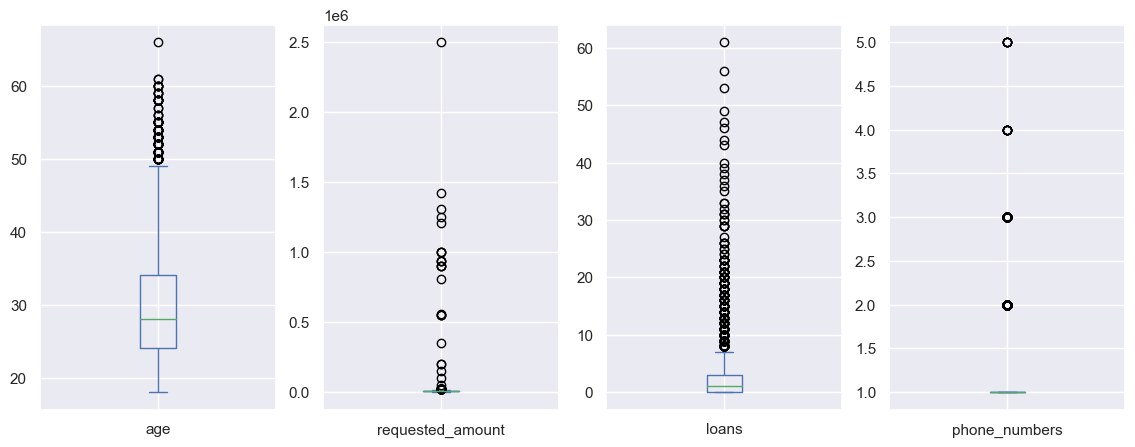

In [97]:
ld1[num_feat].plot(
    kind = 'box',
    figsize = (14, 5),
    subplots = True
);

In [98]:
Q1 = ld1[num_feat].quantile(0.25)
Q3 = ld1[num_feat].quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.DataFrame()

for column in num_feat:
    outlier_mask = (ld1[column] < lower_bound[column]) | (ld1[column] > upper_bound[column])
    outliers = pd.concat([outliers, ld1[column][outlier_mask]], axis=1)
outliers.count()

age                 146
requested_amount     94
loans               383
phone_numbers       894
dtype: int64

In [99]:
ld1.describe()

,target,requested_amount,age,loans,phone_numbers
count,4997.000000,4.997000e+03,4997.000000,4997.000000,4997.000000
mean,0.828297,1.009832e+04,30.172504,2.579948,1.202321
std,0.377160,6.778518e+04,7.954853,4.416001,0.465902
min,0.000000,1.000000e+02,18.000000,0.000000,1.000000
25%,1.000000,5.000000e+03,24.000000,0.000000,1.000000
50%,1.000000,5.000000e+03,28.000000,1.000000,1.000000
75%,1.000000,1.000000e+04,34.000000,3.000000,1.000000
max,1.000000,2.500000e+06,66.000000,61.000000,5.000000


## Observing the outliers in our dataset, we could see that the outliers are more than 5% of our data and as such we can't cut out all the rows with outliers applying the 'RULE OF THUMB'. However we can drastically reduce outliers by removing top 1% of our observations...

In [101]:
## visualiation of the features before handling the  outliers. 

<Axes: xlabel='age', ylabel='Density'>

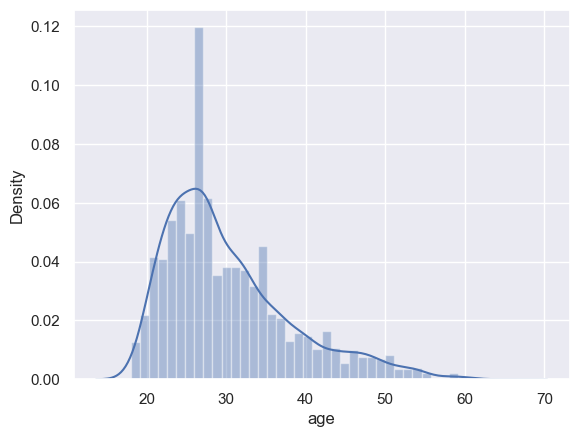

In [102]:
sns.distplot(ld1['age'])

<Axes: xlabel='loans', ylabel='Density'>

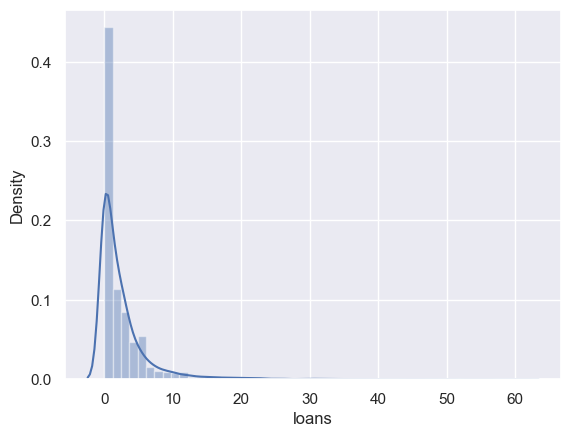

In [103]:
sns.distplot(ld1['loans'])

<Axes: xlabel='phone_numbers', ylabel='Density'>

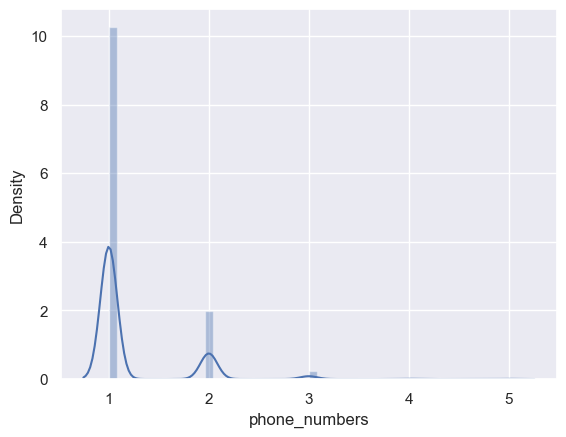

In [104]:
sns.distplot(ld1['phone_numbers'])

In [105]:
q = ld1[num_feat].quantile(0.99)
ld2 = ld1[(ld1['age'] < q['age']) &  (ld1['loans'] < q['loans'])
          & (ld1['phone_numbers'] < q['phone_numbers']) & (ld1['requested_amount'] < q['requested_amount'])]
         
ld2.head()

,target,gender,type_of_residence,educational_attainment,employment_status,sector_of_employment,requested_amount,purpose,loan_request_day,age,selfie_id_check,loans,phone_numbers,mobile_os,income_range
0,1,F,Own House,"BSc, HND and Other Equivalent",Self Employed,Others,10000,Medical,Monday,23,Successful,3,1,ios,Low(0-49999)
1,1,M,Own House,"BSc, HND and Other Equivalent",Employed,Others,10000,Others,Wednesday,32,Successful,3,1,android,Low(0-49999)
3,0,M,Rented Apartment,School Cert,Self Employed,Manufacturing and Construction,10000,Business,Monday,19,Successful,0,1,android,Low(0-49999)
4,1,F,Rented Apartment,"BSc, HND and Other Equivalent",Self Employed,Others,8000,Business,Thursday,28,Successful,0,1,Others,Low(0-49999)
5,0,M,Own House,MSc and Above,Employed,Wholesale and Retail Trade,10000,Medical,Thursday,21,Successful,6,1,Others,Low(0-49999)


In [106]:
## visualiation of the features after reducing the  outliers.

<Axes: xlabel='age', ylabel='Density'>

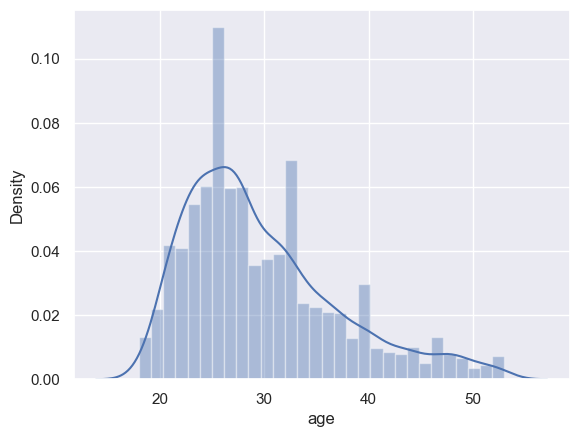

In [107]:
sns.distplot(ld2['age'])

<Axes: xlabel='phone_numbers', ylabel='Density'>

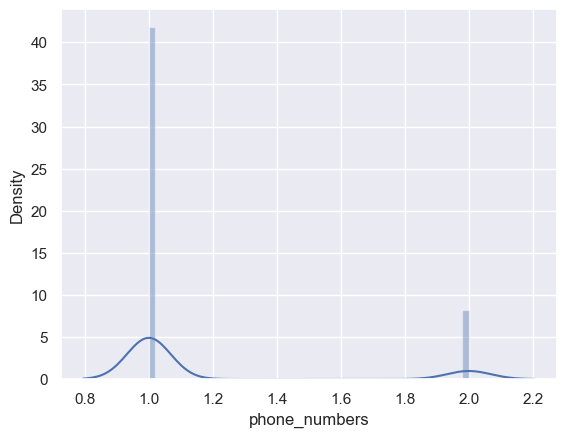

In [108]:
sns.distplot(ld2['phone_numbers'])

<Axes: xlabel='loans', ylabel='Density'>

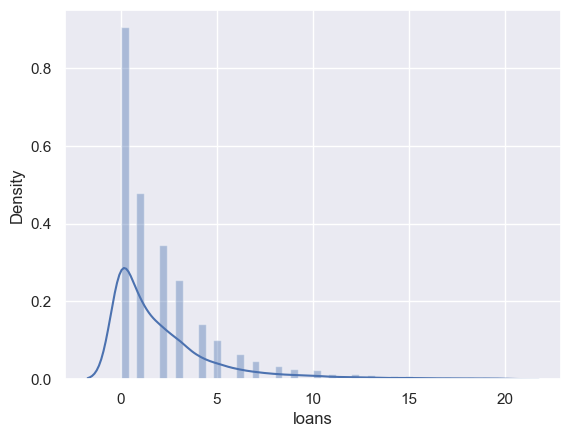

In [109]:
sns.distplot(ld2['loans'])

In [110]:
ld2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4708 entries, 0 to 4996
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   target                  4708 non-null   int32   
 1   gender                  4708 non-null   object  
 2   type_of_residence       4708 non-null   object  
 3   educational_attainment  4708 non-null   object  
 4   employment_status       4708 non-null   object  
 5   sector_of_employment    4708 non-null   object  
 6   requested_amount        4708 non-null   int32   
 7   purpose                 4708 non-null   object  
 8   loan_request_day        4708 non-null   object  
 9   age                     4708 non-null   int64   
 10  selfie_id_check         4708 non-null   object  
 11  loans                   4708 non-null   int64   
 12  phone_numbers           4708 non-null   int64   
 13  mobile_os               4708 non-null   object  
 14  income_range            4708 

In [111]:
cat_feat = ['gender','employment_status','sector_of_employment','loan_request_day','selfie_id_check','type_of_residence', 'educational_attainment','purpose','mobile_os','income_range']

num_feat = ['age','requested_amount','loans','phone_numbers']

#### Encoding Categorical Features

In [157]:
ld2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4708 entries, 0 to 4996
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   target                  4708 non-null   int32   
 1   gender                  4708 non-null   object  
 2   type_of_residence       4708 non-null   object  
 3   educational_attainment  4708 non-null   object  
 4   employment_status       4708 non-null   object  
 5   sector_of_employment    4708 non-null   object  
 6   requested_amount        4708 non-null   int32   
 7   purpose                 4708 non-null   object  
 8   loan_request_day        4708 non-null   object  
 9   age                     4708 non-null   int64   
 10  selfie_id_check         4708 non-null   object  
 11  loans                   4708 non-null   int64   
 12  phone_numbers           4708 non-null   int64   
 13  mobile_os               4708 non-null   object  
 14  income_range            4708 

In [113]:
ld2_encoded = pd.get_dummies(ld2, drop_first=True, dtype=int)
ld2_encoded.head()

,target,requested_amount,age,loans,phone_numbers,gender_M,type_of_residence_Parents Apartment,type_of_residence_Rented Apartment,educational_attainment_Diploma,educational_attainment_Diploma/School Cert,educational_attainment_MSc and Above,educational_attainment_Others,educational_attainment_School Cert,employment_status_Others,employment_status_Self Employed,sector_of_employment_Education,sector_of_employment_Information Technology,sector_of_employment_Manufacturing and Construction,sector_of_employment_Others,sector_of_employment_Transportation & Logistics,sector_of_employment_Wholesale and Retail Trade,purpose_Medical,purpose_Others,purpose_Personal,loan_request_day_Monday,loan_request_day_Saturday,loan_request_day_Sunday,loan_request_day_Thursday,loan_request_day_Tuesday,loan_request_day_Wednesday,selfie_id_check_Successful,mobile_os_android,mobile_os_ios,income_range_Medium-Low(50000-99999),income_range_Medium(10000-199999),income_range_High(200000-399999),income_range_Very High(400000+)
0,1,10000,23,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1,1,10000,32,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0
3,0,10000,19,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,1,8000,28,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0,10000,21,6,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [114]:
X = ld2_encoded.drop('target', axis = 1)
y = ld2_encoded['target']

### Splitting data into test and train

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)

print(X_val.shape)
print(X_test.shape)
print(X_train.shape)

(706, 36)
(707, 36)
(3295, 36)


In [151]:
col_names = X_train.columns

#### Standardizing the numerical features

In [118]:
num_feat

['age', 'requested_amount', 'loans', 'phone_numbers']

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train)
val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(X_test)

#### checking for imbalance in the target variable

<Axes: xlabel='target', ylabel='count'>

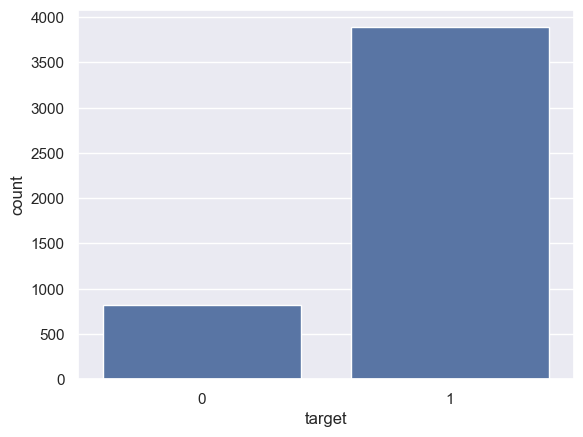

In [121]:
#plt.figure(figsize=(4,2))
sns.countplot(data =ld2,x = 'target')

In [122]:
y_train.value_counts()

target
1    2722
0     573
Name: count, dtype: int64

In [123]:
import imblearn

In [124]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_train_resampled, y_train_resampled = sampler.fit_resample(train_scaled, y_train)

In [125]:
y_train_resampled.value_counts()

target
0    2722
1    2722
Name: count, dtype: int64

#### RANDOM FOREST CLASSIFIER

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
class_weights = {0: 1, 1: 3}

rfc = RandomForestClassifier(n_estimators=50, max_depth=20, class_weight=class_weights, random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(val_scaled)

print(classification_report(y_val,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.13      0.02      0.04       123
           1       0.82      0.97      0.89       583

    accuracy                           0.80       706
   macro avg       0.48      0.50      0.47       706
weighted avg       0.70      0.80      0.74       706



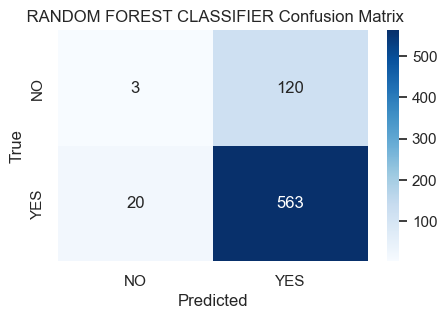

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_rfc)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' RANDOM FOREST CLASSIFIER Confusion Matrix')
plt.show()

#### XGBOOST CLASSIFIER

In [131]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective='binary:logistic', 
                         eval_metric='logloss') 
xg_clf.fit(X_train_resampled, y_train_resampled)
y_pred_xg_clf = xg_clf.predict(val_scaled)

print(classification_report(y_val,y_pred_xg_clf))

              precision    recall  f1-score   support

           0       0.24      0.07      0.11       123
           1       0.83      0.95      0.89       583

    accuracy                           0.80       706
   macro avg       0.53      0.51      0.50       706
weighted avg       0.73      0.80      0.75       706



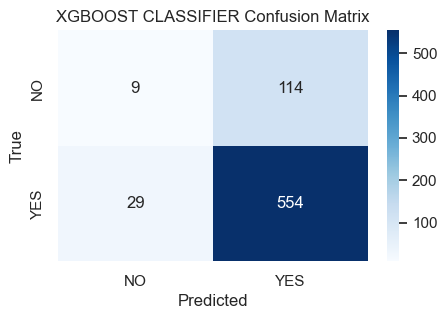

In [132]:
cm = confusion_matrix(y_val,y_pred_xg_clf)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBOOST CLASSIFIER Confusion Matrix')
plt.show()

#### GAUSSIAN NAIVE BAYES

In [134]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)
y_pred_gnb = gnb.predict(val_scaled)

print(classification_report(y_val,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.16      0.59      0.26       123
           1       0.81      0.37      0.50       583

    accuracy                           0.41       706
   macro avg       0.49      0.48      0.38       706
weighted avg       0.70      0.41      0.46       706



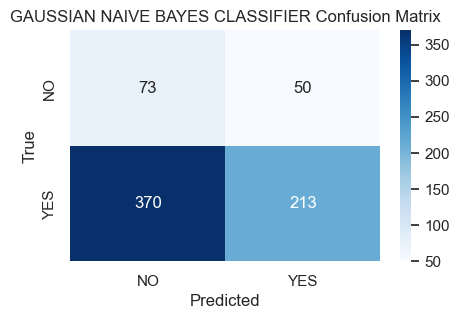

In [135]:
cm = confusion_matrix(y_val,y_pred_gnb)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GAUSSIAN NAIVE BAYES CLASSIFIER Confusion Matrix')
plt.show()

#### BERNOULLI NB

In [137]:
from sklearn.naive_bayes import  BernoulliNB

bnb =  BernoulliNB()
bnb.fit(X_train_resampled, y_train_resampled)
y_pred_bnb = bnb.predict(val_scaled)

print(classification_report(y_val,y_pred_bnb))

              precision    recall  f1-score   support

           0       0.18      0.41      0.25       123
           1       0.83      0.60      0.70       583

    accuracy                           0.57       706
   macro avg       0.50      0.51      0.47       706
weighted avg       0.71      0.57      0.62       706



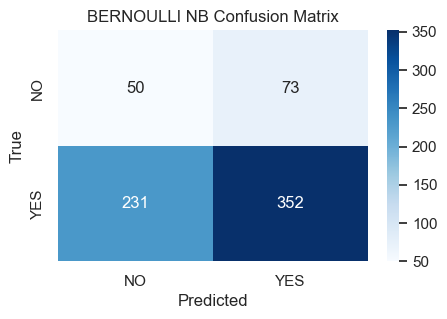

In [138]:
cm = confusion_matrix(y_val,y_pred_bnb)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('BERNOULLI NB Confusion Matrix')
plt.show()

#### MLP CLASSIFIER

In [140]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, max_iter=200, shuffle=True, 
                    random_state=42, tol=0.0001, verbose=False, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=10, max_fun=15000)

mlp.fit(X_train_resampled, y_train_resampled)
y_pred_mlp = mlp.predict(val_scaled)

print(classification_report(y_val,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.22      0.15      0.18       123
           1       0.83      0.89      0.86       583

    accuracy                           0.76       706
   macro avg       0.53      0.52      0.52       706
weighted avg       0.73      0.76      0.74       706



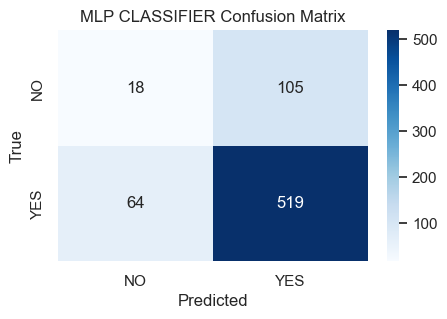

In [141]:
cm = confusion_matrix(y_val,y_pred_mlp)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP CLASSIFIER Confusion Matrix')
plt.show()

#### LOGISTIC REGRESSION

In [143]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv = 5)
lr.fit(X_train_resampled, y_train_resampled)
lr_pred = lr.predict(val_scaled)
print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.17      0.46      0.25       123
           1       0.83      0.54      0.66       583

    accuracy                           0.53       706
   macro avg       0.50      0.50      0.45       706
weighted avg       0.71      0.53      0.59       706



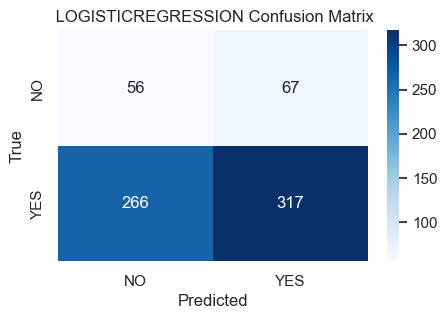

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, lr_pred)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' LOGISTICREGRESSION Confusion Matrix')
plt.show()

In [145]:
lr_pred_test = lr.predict(test_scaled)
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       0.24      0.58      0.34       122
           1       0.88      0.62      0.72       585

    accuracy                           0.61       707
   macro avg       0.56      0.60      0.53       707
weighted avg       0.77      0.61      0.66       707



## FINAL EVALUATION OF THE MODEL WITH THE TEST SET

In [147]:
from sklearn.metrics import classification_report

models = [lr, mlp, bnb, gnb, xg_clf, rfc]
results_list = []

for model in models:
    y_pred = model.predict(test_scaled)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results_list.append({
        'Model': model.__class__.__name__,
        'Accuracy': report['accuracy'], 
        'Precision_0': report['0']['precision'], 
        'Precision_1': report['1']['precision'],
        'Recall_0': report['0']['recall'], 
        'Recall_1': report['1']['recall'],
        'F1_0': report['0']['f1-score'], 
        'F1_1': report['1']['f1-score'] 
    })

results_df = pd.DataFrame(results_list)
results_df

,Model,Accuracy,Precision_0,Precision_1,Recall_0,Recall_1,F1_0,F1_1
0,LogisticRegressionCV,0.609618,0.239865,0.875912,0.581967,0.615385,0.339713,0.722892
1,MLPClassifier,0.749646,0.160494,0.825879,0.106557,0.883761,0.128079,0.853840
2,BernoulliNB,0.615276,0.213740,0.851685,0.459016,0.647863,0.291667,0.735922
3,GaussianNB,0.473833,0.210648,0.887273,0.745902,0.417094,0.328520,0.567442
4,XGBClassifier,0.797737,0.243902,0.831832,0.081967,0.947009,0.122699,0.885691
5,RandomForestClassifier,0.800566,0.120000,0.825513,0.024590,0.962393,0.040816,0.888713


### CRITICAL OBSERVATION OF MY BEST MODEL WITH THE FINAL TEST DATA

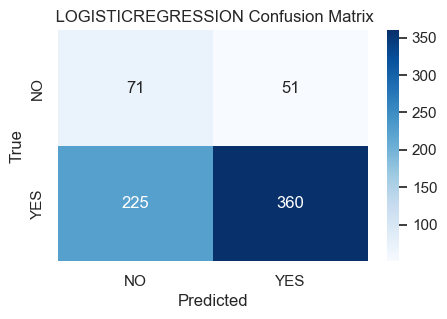

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_pred_test)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' LOGISTICREGRESSION Confusion Matrix')
plt.show()

In [155]:
# saving the best model and other resources
import joblib
joblib.dump(lr, 'ldsqr_lr_model.pkl')
joblib.dump(col_names, 'col_name.pkl')
joblib.dump(scaler, 'ldsqr_scaler.pkl')

['ldsqr_scaler.pkl']